In [1]:
import numpy as np
import pandas as pd
import os
import urllib.request
from astropy.io import fits 
import matplotlib.pyplot as plt

In [2]:
n_specs = 1000
catalog = pd.read_csv("Skyserver.csv", header=1)
catalog = catalog[catalog["plate"] >= 3523]
catalog = catalog.iloc[:n_specs]

In [3]:
catalog

,plate,mjd,fiberid,z,zErr,zWarning,class
0,6413,56336,495,0.472712,0.000144,0,GALAXY
1,6413,56336,497,0.436013,0.000111,0,GALAXY
2,6413,56336,498,0.313152,0.000078,0,GALAXY
3,6413,56336,499,0.345445,0.000072,0,GALAXY
4,6413,56336,500,0.409196,0.000080,0,GALAXY
...,...,...,...,...,...,...,...
1762,8739,57645,558,-0.000009,0.000009,0,STAR
1763,8739,57645,560,0.000024,0.000033,0,STAR
1764,8739,57645,561,0.767245,0.000183,0,QSO
1765,8739,57645,562,0.391585,0.000030,0,GALAXY


In [4]:
for i, obj in catalog.iterrows():
    plate = str(obj[0])
    mjd = str(obj[1])
    fiber = str(obj[2]).zfill(4)
    
    spec_file="spec-"+plate+"-"+mjd+"-"+fiber+".fits"
    url_file = "https://data.sdss.org/sas/dr17/eboss/spectro/redux/v5_13_2/spectra/lite/"+plate+"/"+spec_file

    plates_local='./specs/'

    if not os.path.exists(plates_local):
            os.makedirs(plates_local)

    local_file=plates_local+spec_file
    if not os.path.exists(local_file):
        print("downloading %s"
                % (local_file))
        tmp = urllib.request.urlretrieve(url_file, local_file)
    else:
        print('%s present on disk. '%(local_file))

./specs/spec-6413-56336-0495.fits present on disk. 
./specs/spec-6413-56336-0497.fits present on disk. 
./specs/spec-6413-56336-0498.fits present on disk. 
./specs/spec-6413-56336-0499.fits present on disk. 
./specs/spec-6413-56336-0500.fits present on disk. 
./specs/spec-6413-56336-0501.fits present on disk. 
./specs/spec-6413-56336-0502.fits present on disk. 
./specs/spec-6413-56336-0503.fits present on disk. 
./specs/spec-6413-56336-0505.fits present on disk. 
./specs/spec-6413-56336-0506.fits present on disk. 
./specs/spec-6413-56336-0507.fits present on disk. 
./specs/spec-6413-56336-0508.fits present on disk. 
./specs/spec-6413-56336-0509.fits present on disk. 
./specs/spec-6413-56336-0510.fits present on disk. 
./specs/spec-6413-56336-0511.fits present on disk. 
./specs/spec-6413-56336-0512.fits present on disk. 
./specs/spec-6413-56336-0513.fits present on disk. 
./specs/spec-6413-56336-0514.fits present on disk. 
./specs/spec-6413-56336-0515.fits present on disk. 
./specs/spec

In [5]:
fluxes = []
wls = []
for i, obj in catalog.iterrows():
  plate = str(obj[0])
  mjd = str(obj[1])
  fiber = str(obj[2]).zfill(4)

  spec_file = "spec-" + plate + "-" + mjd + "-" + fiber + ".fits"
  plates_local = './specs/'

  fits_file = fits.open(plates_local + spec_file)
  print(plates_local+spec_file)
  flux = fits_file["COADD"].data["flux"]
  wl = fits_file["COADD"].data["loglam"]
  fluxes.append(flux)
  wls.append(wl)

./specs/spec-6413-56336-0495.fits
./specs/spec-6413-56336-0497.fits
./specs/spec-6413-56336-0498.fits
./specs/spec-6413-56336-0499.fits
./specs/spec-6413-56336-0500.fits
./specs/spec-6413-56336-0501.fits
./specs/spec-6413-56336-0502.fits
./specs/spec-6413-56336-0503.fits
./specs/spec-6413-56336-0505.fits
./specs/spec-6413-56336-0506.fits
./specs/spec-6413-56336-0507.fits
./specs/spec-6413-56336-0508.fits
./specs/spec-6413-56336-0509.fits
./specs/spec-6413-56336-0510.fits
./specs/spec-6413-56336-0511.fits
./specs/spec-6413-56336-0512.fits
./specs/spec-6413-56336-0513.fits
./specs/spec-6413-56336-0514.fits
./specs/spec-6413-56336-0515.fits
./specs/spec-6413-56336-0516.fits
./specs/spec-6413-56336-0517.fits
./specs/spec-6413-56336-0519.fits
./specs/spec-6413-56336-0520.fits
./specs/spec-6413-56336-0521.fits
./specs/spec-6413-56336-0522.fits
./specs/spec-6413-56336-0523.fits
./specs/spec-6413-56336-0525.fits
./specs/spec-6413-56336-0526.fits
./specs/spec-6413-56336-0527.fits
./specs/spec-6

In [6]:
print(len(fluxes[0]),len(wls[0]))

4632 4632


In [8]:
for i, wl in zip(range(len(wls)), wls):
  minlim = np.array([wl.min() for wl in wls]).max()
  maxlim = np.array([wl.max() for wl in wls]).min()
  lims = np.logical_and(wl <= maxlim, wl >= minlim)
  fluxes[i] = fluxes[i][lims]
  wls[i] = wls[i][lims]

y_true = catalog["class"].to_numpy()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import Perceptron

c:\Users\tu_rk\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# import data
n_datasets = 1
data = np.array([fluxes])
datasets_names = ["Spectra"]

In [24]:
# make the classifiers list
# classifiers = [NearestCentroid(),
#                KNeighborsClassifier(n_neighbors=5),
#                SVC(C=10, gamma=0.1, kernel="rbf"),
#                Perceptron(l1_ratio=0.3,max_iter=5),
#                MLPClassifier(hidden_layer_sizes=(2,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001),
#                MLPClassifier(hidden_layer_sizes=(3,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001),
#                MLPClassifier(hidden_layer_sizes=(4,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001)]

classifiers = [MLPClassifier(hidden_layer_sizes=(2,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001),
               MLPClassifier(hidden_layer_sizes=(3,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001),                MLPClassifier(hidden_layer_sizes=(4,), activation="logistic", max_iter=1000, solver="lbfgs", alpha=0.001)]

n_classifiers = len(classifiers)
classifiers_names = ["MDC", "k-NN", "SVC", "Perceptron", "MLP 2-2-1", "MLP 2-3-1", "MLP 2-4-1"]

In [ ]:
# set the KFold object to compute the accuracies
n_splits = 3
kf = KFold(n_splits=n_splits)
accuracy = np.zeros((n_datasets,n_classifiers))
# iteration over datasets
for i in range(n_datasets):
  X = data[i]
  y = y_true
  # iteration over classifiers
  for j in range(n_classifiers):
    classifier = classifiers[j]  
    accuracy_k = np.zeros(n_splits)
    split_counter = 0
    # iteration over splits
    for train_index, test_index in kf.split(X):

      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      # fiting the classifier
      classifier.fit(X_train, y_train)
      y_pred = classifier.predict(X_test)
      # computing split accuracy
      accuracy_k[split_counter] = accuracy_score(y_test, y_pred)
      split_counter += 1
    # compute the mean accuracy
    accuracy[i][j] = np.sum(accuracy_k)/n_splits

In [26]:
accuracy

array([[0.8220406 , 0.82299665, 0.82802563]])

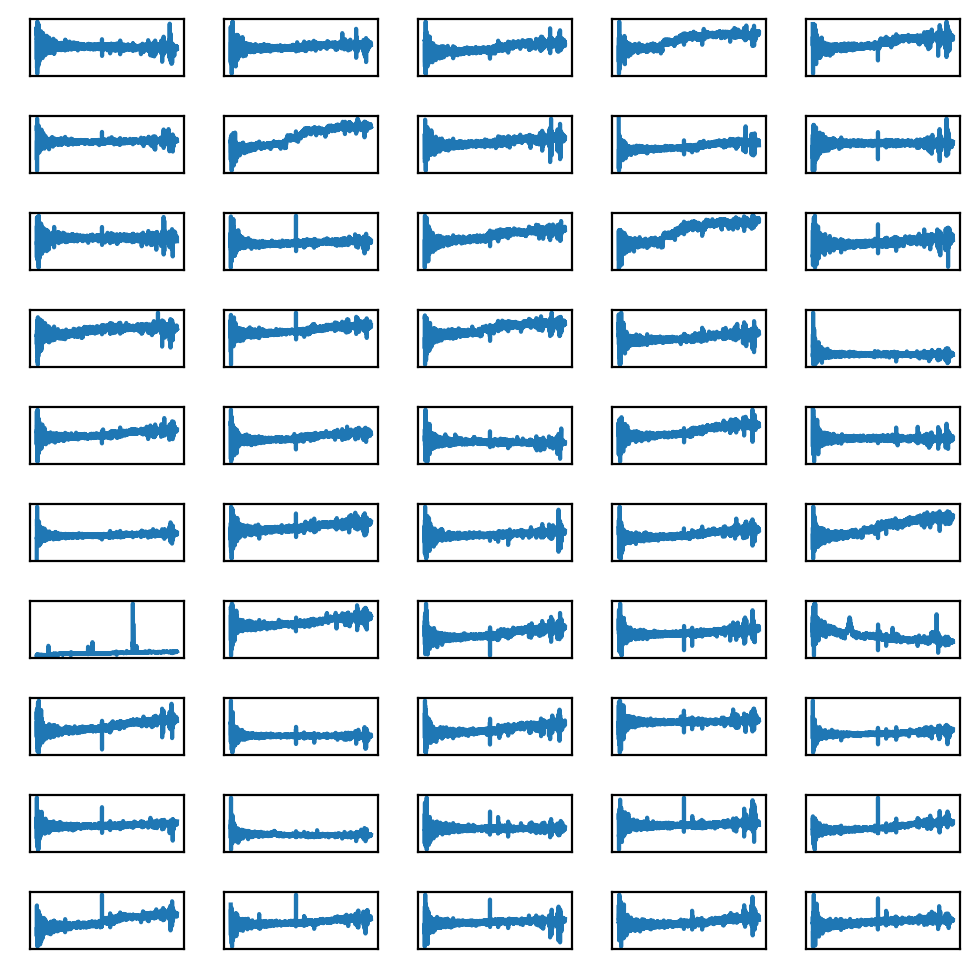

In [73]:
n_rows = 10
n_cols = 5
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_rows/2,n_cols),dpi=200)
for i in range(n_rows*n_cols):
  ax[int(i/n_cols),int(i%n_cols)].plot(wls[i],fluxes[i])
  ax[int(i/n_cols),int(i%n_cols)].set_xticks([])
  ax[int(i/n_cols),int(i%n_cols)].set_yticks([])

plt.tight_layout()